<a href="https://colab.research.google.com/github/alwinclement/titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [96]:
titanic = pd.read_csv("tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
titanic.shape

(418, 12)

In [98]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [99]:
titanic.drop("Cabin" , axis = 1 , inplace = True)

In [100]:
titanic.dropna( inplace = True)

In [101]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [102]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<ipython-input-103-6f573d87fb96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = "Survived" ,data =titanic, palette ="deep")


<Axes: xlabel='Survived', ylabel='count'>

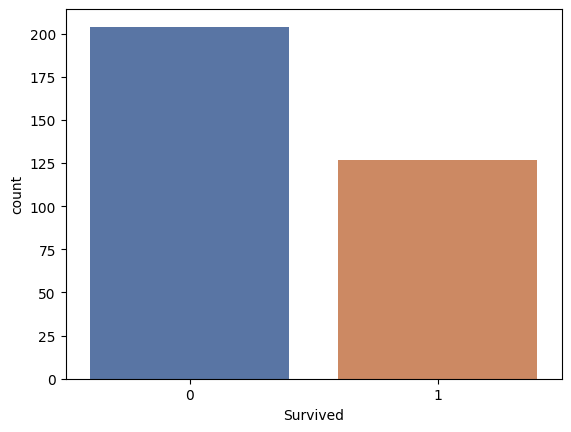

In [103]:
sns.countplot( x = "Survived" ,data =titanic, palette ="deep")

<Axes: xlabel='Survived', ylabel='count'>

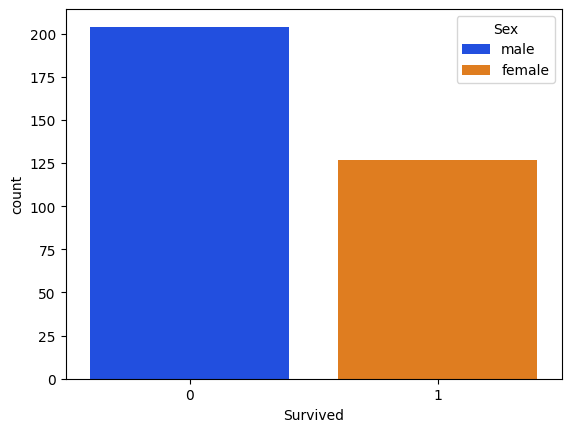

In [104]:
sns.countplot( x = "Survived" , data = titanic ,hue = "Sex", palette = "bright")

<Axes: xlabel='Survived', ylabel='count'>

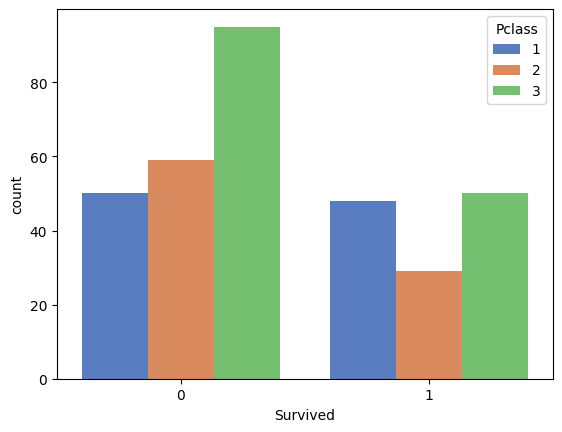

In [105]:
sns.countplot( x = "Survived", data = titanic , hue = "Pclass", palette = "muted")

In [106]:
sex = pd.get_dummies(titanic["Sex"], drop_first = True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [107]:
embark = pd.get_dummies(titanic["Embarked"],drop_first = True)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [108]:
titanic = pd.concat([titanic,sex,embark], axis = 1)


In [109]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [110]:
titanic.drop(["Name","PassengerId","Pclass","Sex","Ticket","Embarked"], axis = 1,inplace= True)


In [111]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,34.5,0,0,7.8292,1,1,0
1,1,47.0,1,0,7.0000,0,0,1
2,0,62.0,0,0,9.6875,1,1,0
3,0,27.0,0,0,8.6625,1,0,1
4,1,22.0,1,1,12.2875,0,0,1


In [112]:
X = titanic.drop("Survived",axis = 1)
Y = titanic["Survived"]

In [113]:

from sklearn.model_selection import train_test_split

In [114]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.4, random_state = 4)

In [115]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [116]:
lm.fit(X_train,Y_train)

LogisticRegression()

In [118]:
prediction = lm.predict(X_test)

In [119]:
from sklearn.metrics import classification_report

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(Y_test,prediction)

1.0